In [1]:
# Association Rule Mining finds interesting associations and relationships among items in large dataset
# How frequenctly a itemset(combination of items) occurs in transactions.
# Popular Algorithm is Market Basket Analysis

# Market Basket Analysis identifies frequent itemsets in transactions and widely used in retail,
# ecommerce, etc. 
# Market Basket Analysis - Apriori Algorithm is widely used

# Apriori Algorithm conducts association rule mining that is a rule based process and identifies
# correlations between items purchased by users.
# Apriori Algorithm creates frequent sets that are combination of items purchesed as a bundle
# Apriori Algorithm has 3 main components: Support, Lift and Confidence

# Support assesses the overall popularity of a given product.
#            Transactions comprising the itemset
# Support = --------------------------------------
#                  Total Transactions
# A High support value indicates that item is present in most purcahses and supply of this item
# is critical

# Confidence is the likelihood of different purchase combinations
#                                     Transactions comprising Bread and Milk
# Confidence (Bread ------> Milk) = ---------------------------------------
#                                       Transactions comprising of Bread
# Confidence is what percentage of consumers who bought Bread also bought Milk

# Lift refers to increase in the ratio of sale of milk when bread is sold
#         Confidence (Bread ------> Milk)
# Lift = ----------------------------------
#            Support(Bread)
# How many times customers are likely to purchase milk when bread is bought

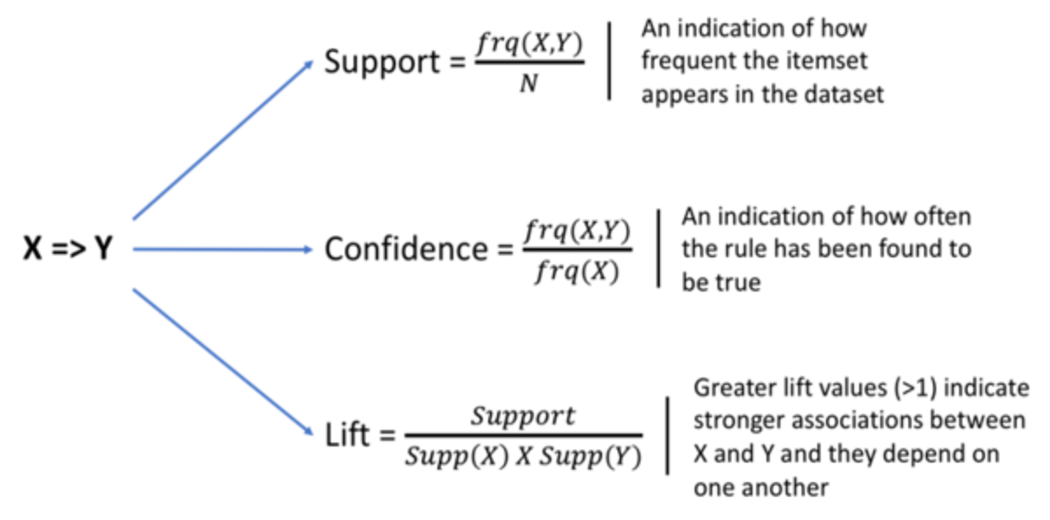

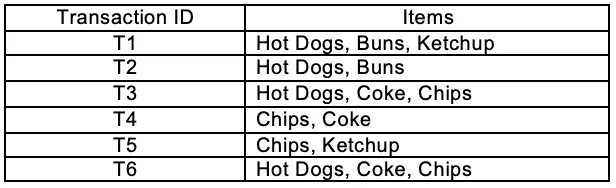
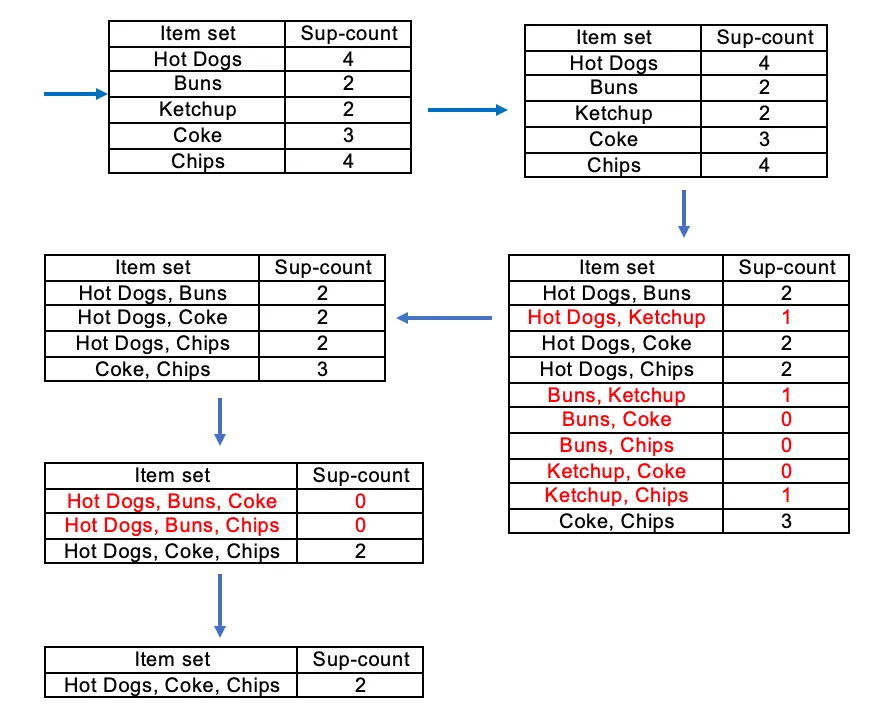

In [1]:
# install apyori
#!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=94f02d1d46a309ac5859e79e36182c67be4af0fcbdfb31d0be87f65876794d09
  Stored in directory: c:\users\srava\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [2]:
# importing required libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd 'C:\Users\srava\github projects\Market Basket Analysis\Tansactions'

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "'C:\\Users\\srava\\github projects\\Market Basket Analysis\\Tansactions'"
C:\Users\srava\github projects\Market Basket Analysis\Tansactions


In [4]:
# importing data set
transactions=pd.read_csv("transactions.csv")

In [6]:
transactions.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Transactions Data must be restructured into List of Lists
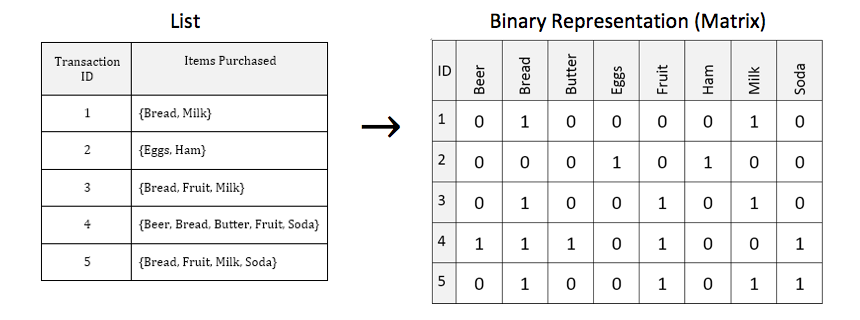

In [9]:
l=[]
for i in range(1,7500):
    l.append([str(transactions.values[i,j]) for j in range(0,20)])

In [10]:
# import apriori
from apyori import apriori

In [11]:
assoc_rules=apriori(l,min_support=0.003,min_confidence=0.50,min_lift=3)
# min_support,min_confidence,min_lift will decide the number of rules generated
# As the values increase less number of rules will be generated

In [12]:
assoc_rules=list(assoc_rules)

In [13]:
assoc_rules

[RelationRecord(items=frozenset({'cereals', 'spaghetti', 'ground beef'}), support=0.0030670756100813442, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cereals', 'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.6764705882352942, lift=3.884267183136654)]),
 RelationRecord(items=frozenset({'milk', 'chicken', 'olive oil'}), support=0.0036004800640085347, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken', 'olive oil'}), items_add=frozenset({'milk'}), confidence=0.5, lift=3.8575102880658436)]),
 RelationRecord(items=frozenset({'cooking oil', 'spaghetti', 'ground beef'}), support=0.004800640085344712, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cooking oil', 'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.5714285714285714, lift=3.2811201050098444)]),
 RelationRecord(items=frozenset({'spaghetti', 'eggs', 'red wine'}), support=0.003733831177490332, ordered_statistics=[OrderedStatistic(items_base=frozenset({'eggs

In [14]:
len(assoc_rules)

28

In [17]:
# mlxtend is also used for market basket analysis
#!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.4 MB 3.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00


In [18]:
from mlxtend.preprocessing import TransactionEncoder

In [19]:
encoder=TransactionEncoder().fit(l)

In [20]:
onehot=encoder.transform(l)

In [23]:
transact_encode=pd.DataFrame(onehot,columns=encoder.columns_).drop('nan',axis=1)

In [24]:
from mlxtend.frequent_patterns import apriori

In [25]:
freq_items=apriori(transact_encode,min_support=0.003,max_len=3,use_colnames=True)

In [26]:
freq_items.sort_values(by="support",ascending=False).head(10)

,support,itemsets
69,0.238298,(mineral water)
34,0.179624,(eggs)
96,0.174157,(spaghetti)
40,0.170956,(french fries)
23,0.163889,(chocolate)
51,0.132018,(green tea)
68,0.129617,(milk)
52,0.098280,(ground beef)
46,0.095346,(frozen vegetables)
78,0.095079,(pancakes)


In [27]:
from mlxtend.frequent_patterns import association_rules

In [28]:
associate_rules=association_rules(freq_items,metric="lift",min_threshold=3)

In [29]:
associate_rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         188 non-null    object 
 1   consequents         188 non-null    object 
 2   antecedent support  188 non-null    float64
 3   consequent support  188 non-null    float64
 4   support             188 non-null    float64
 5   confidence          188 non-null    float64
 6   lift                188 non-null    float64
 7   leverage            188 non-null    float64
 8   conviction          188 non-null    float64
 9   zhangs_metric       188 non-null    float64
dtypes: float64(8), object(2)
memory usage: 14.8+ KB


In [30]:
associate_rules.sort_values(by="lift",ascending=False).head(10)

# Association Rule - antecedents and consequents
# Multiple Antecedents Rule
#   Antecedent(mineral water, whole wheat pasta)----->(olive oil)Consequent
# Multiple Consequents Rule
#   Antecedent(whole wheat pasta)----->(olive oil,mineralwater)Consequent
# Multiple Antecedents Rule and Multiple Consequents Rule
#  Antecedent(whole wheat pasta,oliveoil)----->(olive oil,mineralwater)Consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
174,"(mineral water, whole wheat pasta)",(olive oil),0.009601,0.065742,0.003867,0.402778,6.126634,0.003236,1.564339,0.844890
177,(olive oil),"(mineral water, whole wheat pasta)",0.065742,0.009601,0.003867,0.058824,6.126634,0.003236,1.052299,0.895661
144,"(spaghetti, ground beef)",(tomato sauce),0.039205,0.014135,0.003067,0.078231,5.534495,0.002513,1.069536,0.852747
145,(tomato sauce),"(spaghetti, ground beef)",0.014135,0.039205,0.003067,0.216981,5.534495,0.002513,1.227039,0.831062
12,(fromage blanc),(honey),0.013602,0.047340,0.003334,0.245098,5.177437,0.002690,1.261966,0.817980
13,(honey),(fromage blanc),0.047340,0.013602,0.003334,0.070423,5.177437,0.002690,1.061125,0.846948
147,(ground beef),"(tomato sauce, spaghetti)",0.098280,0.006268,0.003067,0.031208,4.979272,0.002451,1.025743,0.886270
142,"(tomato sauce, spaghetti)",(ground beef),0.006268,0.098280,0.003067,0.489362,4.979272,0.002451,1.765869,0.804208
2,(light cream),(chicken),0.015602,0.060008,0.004534,0.290598,4.842659,0.003598,1.325049,0.806078
3,(chicken),(light cream),0.060008,0.015602,0.004534,0.075556,4.842659,0.003598,1.064854,0.844158


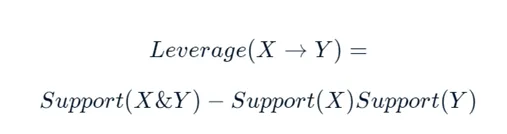
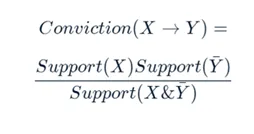
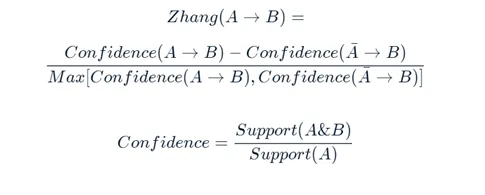

In [31]:
# Zhang's metric - Strength of Association lie between -1(disassociatio) to 1(Association)

# Conviction metric - >1 Product X is strongly dependent on presence of Product Y and 
# <1 Product X is NOT strongly dependent on presence of Product Y 